<a href="https://colab.research.google.com/github/ArmstrongVo/VoTrongLuan.github.io/blob/main/AI_W12_PRE_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.5 MB/s eta 0:00:00


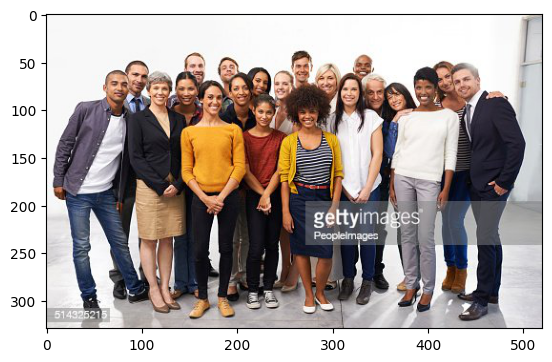

In [2]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/drive/MyDrive/DATA FOR AI/people.jpg'
img=plt.imread(filename)
plt.imshow(img) 

In [4]:
detector=MTCNN()  # ĐẶT BỘ PHÁT HIỆN BẰNG HÀM MTCNN
faces=detector.detect_faces(img)  

4/4 [==============================] - 0s 30ms/step


In [5]:
for face in faces:   
  print(face)
  #box(tọa độ x,y, kích thước vùng chưa khuôn mặt)
  #keypoints(vị trí mắt mũi miệng để sau này dùng làm nhận diện cảm xúc)

{'box': [165, 76, 20, 28], 'confidence': 0.9999997615814209, 'keypoints': {'left_eye': (171, 87), 'right_eye': (181, 87), 'nose': (177, 93), 'mouth_left': (171, 96), 'mouth_right': (181, 96)}}
{'box': [219, 93, 18, 24], 'confidence': 0.9999990463256836, 'keypoints': {'left_eye': (225, 102), 'right_eye': (233, 103), 'nose': (229, 108), 'mouth_left': (224, 110), 'mouth_right': (232, 111)}}
{'box': [109, 70, 19, 23], 'confidence': 0.9999942779541016, 'keypoints': {'left_eye': (115, 78), 'right_eye': (124, 78), 'nose': (120, 83), 'mouth_left': (114, 86), 'mouth_right': (124, 86)}}
{'box': [259, 46, 17, 22], 'confidence': 0.9999874830245972, 'keypoints': {'left_eye': (264, 55), 'right_eye': (272, 54), 'nose': (269, 60), 'mouth_left': (264, 63), 'mouth_right': (272, 62)}}
{'box': [334, 71, 20, 27], 'confidence': 0.999977707862854, 'keypoints': {'left_eye': (340, 82), 'right_eye': (350, 81), 'nose': (346, 89), 'mouth_left': (341, 92), 'mouth_right': (350, 92)}}
{'box': [216, 61, 16, 24], 'con

4/4 [==============================] - 0s 4ms/step


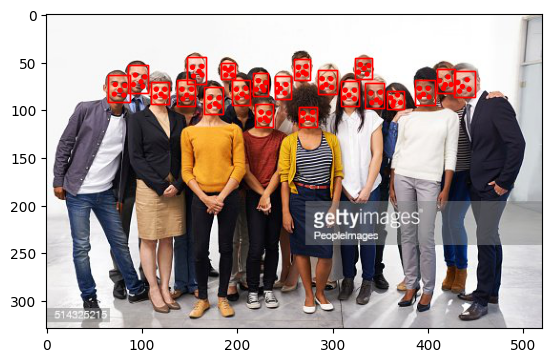

In [22]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/drive/MyDrive/DATA FOR AI/people.jpg'
img=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(img)    # xác định các khuôn mặt có trong img
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']   
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')    # định vị và suất ảnh đã định vị
  ax.add_patch(rect)
plt.savefig('/content/drive/MyDrive/DATA FOR AI/face.jpg')   # lưu lại kết quả

for face in faces:
  x,y,width,height=face['box']   
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')    # định vị và suất ảnh đã định vị
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot=plt.Circle(value,radius=2,color='red')   # xác định vị trí mắt, mũi ,miệng 
    ax.add_patch(dot)
plt.savefig('/content/drive/MyDrive/DATA FOR AI/face_items.jpg')   # lưu lại kết quả
plt.show()


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 200ms/step


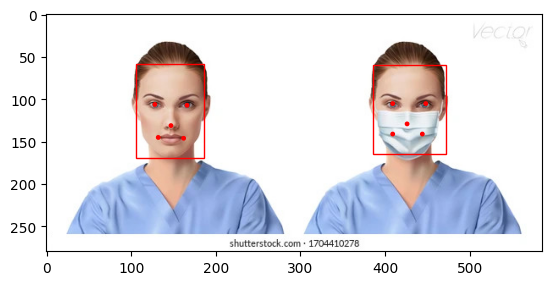

In [26]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
filename='/content/drive/MyDrive/DATA FOR AI/face_mask_no.jpg'
img=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(img)    # xác định các khuôn mặt có trong img
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']   
  rect=plt.Rectangle((x,y),width,height,fill=False,color='red')    # định vị và suất ảnh đã định vị
  ax.add_patch(rect)
  for key,value in face['keypoints'].items():
    dot=plt.Circle(value,radius=2,color='red')   # xác định vị trí mắt, mũi ,miệng 
    ax.add_patch(dot)
plt.savefig('/content/drive/MyDrive/DATA FOR AI/face_mask_item.jpg')   # lưu lại kết quả
plt.show()

1/1 [==============================] - 0s 135ms/step


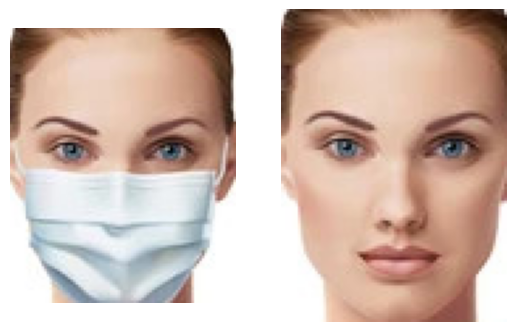

In [32]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename,result_list):
  data=plt.imread(filename)
  for i in range (len(result_list)):
    x1,y1,width,height=result_list[i]['box']
    x2,y2=x1+width,y1+height
    plt.subplot(1,len(result_list),i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2,x1:x2])
    plt.savefig('/content/drive/MyDrive/DATA FOR AI/face'+str(i)+'.jpg')
  plt.show()
filename='/content/drive/MyDrive/DATA FOR AI/face_mask_no.jpg'
img=plt.imread(filename)
detector=MTCNN()
faces=detector.detect_faces(img) 

draw_faces(filename,faces)


In [40]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/DATA FOR AI/animal.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n02444819', 'otter', 0.8247393), ('n02137549', 'mongoose', 0.10890094), ('n02361337', 'marmot', 0.019542132)]


In [42]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/DATA FOR AI/flower.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=1)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 1s 1s/step
Predicted: [('n11939491', 'daisy', 0.46790957)]


In [44]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/DATA FOR AI/rose.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 1s 884ms/step
Predicted: [('n03991062', 'pot', 0.43265858), ('n04522168', 'vase', 0.22791527), ('n02808304', 'bath_towel', 0.14513189)]


1/1 [==============================] - 0s 219ms/step
Predicted: [('n02444819', 'otter', 0.9471923)]


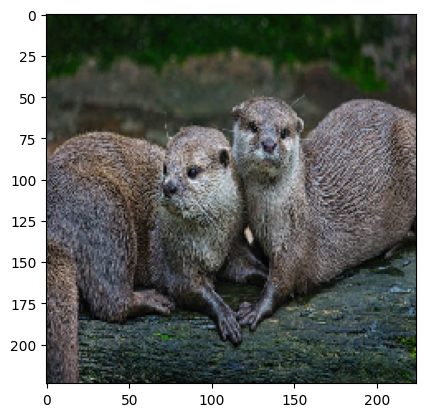

In [54]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = '/content/drive/MyDrive/DATA FOR AI/animal.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(features, top=1)[0])
plt.imshow(img)

In [60]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/drive/MyDrive/DATA FOR AI/car.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)
print('Predicted:', decode_predictions(block4_pool_features, top=1)[0])
plt.imshow(img)


1/1 [==============================] - 0s 193ms/step


ValueError: ignored